## Text Mining Assignment Q2

#### 2) extract and perform emotion mining on the Amazon reviews

In [1]:
import pandas as pd
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer 
import nltk
import spacy
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Read the data
data = pd.read_csv('amazonreviews.tsv',sep='\t', error_bad_lines=False)
data

,label,review
0,pos,Stuning even for the non-gamer: This sound tra...
1,pos,The best soundtrack ever to anything.: I'm rea...
2,pos,Amazing!: This soundtrack is my favorite music...
3,pos,Excellent Soundtrack: I truly like this soundt...
4,pos,"Remember, Pull Your Jaw Off The Floor After He..."
...,...,...
9995,pos,A revelation of life in small town America in ...
9996,pos,Great biography of a very interesting journali...
9997,neg,Interesting Subject; Poor Presentation: You'd ...
9998,neg,Don't buy: The box looked used and it is obvio...


In [3]:
#Removing the trailing and leading characters
data['review'] = data['review'].str.strip()

In [4]:
# Removing the empty strings, because they are considered in Python as False
data.dropna(subset=['review'], inplace=True)
data

,label,review
0,pos,Stuning even for the non-gamer: This sound tra...
1,pos,The best soundtrack ever to anything.: I'm rea...
2,pos,Amazing!: This soundtrack is my favorite music...
3,pos,Excellent Soundtrack: I truly like this soundt...
4,pos,"Remember, Pull Your Jaw Off The Floor After He..."
...,...,...
9995,pos,A revelation of life in small town America in ...
9996,pos,Great biography of a very interesting journali...
9997,neg,Interesting Subject; Poor Presentation: You'd ...
9998,neg,Don't buy: The box looked used and it is obvio...


In [5]:
# Stopwords

In [6]:
nltk.download('stopwords')
my_stopwords = stopwords.words('english')
my_stopwords[0:10]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [7]:
#removing stopwords
data['review'] = data['review'].apply(lambda x: ' '.join([x for x in x.split() if x not in (my_stopwords)]))
data['review']

0       Stuning even non-gamer: This sound track beaut...
1       The best soundtrack ever anything.: I'm readin...
2       Amazing!: This soundtrack favorite music time,...
3       Excellent Soundtrack: I truly like soundtrack ...
4       Remember, Pull Your Jaw Off The Floor After He...
                              ...                        
9995    A revelation life small town America early 190...
9996    Great biography interesting journalist: This b...
9997    Interesting Subject; Poor Presentation: You'd ...
9998    Don't buy: The box looked used obviously new. ...
9999    Beautiful Pen Fast Delivery.: The pen shipped ...
Name: review, Length: 10000, dtype: object

In [8]:
#removing punctuations
data['review'] = data['review'].str.replace(r'[^\w\s]+', '')
data['review']

0       Stuning even nongamer This sound track beautif...
1       The best soundtrack ever anything Im reading l...
2       Amazing This soundtrack favorite music time ha...
3       Excellent Soundtrack I truly like soundtrack I...
4       Remember Pull Your Jaw Off The Floor After Hea...
                              ...                        
9995    A revelation life small town America early 190...
9996    Great biography interesting journalist This bi...
9997    Interesting Subject Poor Presentation Youd har...
9998    Dont buy The box looked used obviously new I t...
9999    Beautiful Pen Fast Delivery The pen shipped pr...
Name: review, Length: 10000, dtype: object

In [9]:
#Converting to lower case 
data['review'] = data['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data['review']

0       stuning even nongamer this sound track beautif...
1       the best soundtrack ever anything im reading l...
2       amazing this soundtrack favorite music time ha...
3       excellent soundtrack i truly like soundtrack i...
4       remember pull your jaw off the floor after hea...
                              ...                        
9995    a revelation life small town america early 190...
9996    great biography interesting journalist this bi...
9997    interesting subject poor presentation youd har...
9998    dont buy the box looked used obviously new i t...
9999    beautiful pen fast delivery the pen shipped pr...
Name: review, Length: 10000, dtype: object

In [10]:
# Stemming
st = PorterStemmer()
data['review'] = data['review'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
data['review']

0       stune even nongam thi sound track beauti it pa...
1       the best soundtrack ever anyth im read lot rev...
2       amaz thi soundtrack favorit music time hand do...
3       excel soundtrack i truli like soundtrack i enj...
4       rememb pull your jaw off the floor after hear ...
                              ...                        
9995    a revel life small town america earli 1900 tho...
9996    great biographi interest journalist thi biogra...
9997    interest subject poor present youd hardpress t...
9998    dont buy the box look use obvious new i tri co...
9999    beauti pen fast deliveri the pen ship promptli...
Name: review, Length: 10000, dtype: object

## Sentiment analysis

In [11]:
#Sentiment analysis
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [12]:
#Slicing the text
from itertools import islice
def take(n,iterable):
    "Return first n items of the iterable as list"
    return list(islice(iterable,n))

In [13]:
#coverting to dic format and for 20 words
affinity_scores = afinn.set_index('word')['value'].to_dict()
take(20,affinity_scores.items())

[('abandon', -2),
 ('abandoned', -2),
 ('abandons', -2),
 ('abducted', -2),
 ('abduction', -2),
 ('abductions', -2),
 ('abhor', -3),
 ('abhorred', -3),
 ('abhorrent', -3),
 ('abhors', -3),
 ('abilities', 2),
 ('ability', 2),
 ('aboard', 1),
 ('absentee', -1),
 ('absentees', -1),
 ('absolve', 2),
 ('absolved', 2),
 ('absolves', 2),
 ('absolving', 2),
 ('absorbed', 1)]

In [14]:
#Function to calculate the sentiment score
nlp = spacy.load("en_core_web_sm")
sentiment_lexicon = affinity_scores

def calculate_sentiment(Text: str = None):
    sent_score = 0
    if Text:
        Text = nlp(Text)
        for word in Text:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [15]:
#calulating the sentiment value for each sentence
data['sentiment_value'] = data['review'].apply(calculate_sentiment)
data['sentiment_value']

0        5
1        8
2        9
3        9
4       12
        ..
9995    10
9996     8
9997     7
9998     0
9999    12
Name: sentiment_value, Length: 10000, dtype: int64

In [16]:
#word count for "clean"column
data['word_count'] = data['review'].str.split().apply(len)
data['word_count'].head(10)

0    51
1    55
2    80
3    83
4    59
5    80
6    85
7    54
8    59
9    39
Name: word_count, dtype: int64

In [17]:
#sort based on sentiment value
data.sort_values(by='sentiment_value').head(10)

,label,review,sentiment_value,word_count
3093,neg,an insult marin as soon movi start i saw wwe t...,-26,103
2908,neg,geh blah blah sexi girl blah blah fight robot ...,-23,21
8195,neg,wish i could give 0 star thi one worst movi i ...,-20,87
8358,neg,im afraid suck i saw neg review thought must u...,-20,61
4406,neg,stupid student review gabriel c romeo juliet s...,-19,80
2901,neg,redefinit lame i low expect still met my satis...,-19,60
3695,neg,jack the idjit i think three compani worst sit...,-19,35
1269,neg,the worst ever i thought book worst book ever ...,-19,46
718,neg,just skip it when read book know read 100 true...,-19,89
8132,neg,bewar evil capitalist and ghost movi them some...,-18,86


In [18]:
data['sentiment_value'].describe()

count    10000.000000
mean         3.548900
std          6.215776
min        -26.000000
25%          0.000000
50%          3.000000
75%          7.000000
max         47.000000
Name: sentiment_value, dtype: float64

In [19]:
#sentiment value less than or equal to 0
data[data['sentiment_value']<0]

,label,review,sentiment_value,word_count
6,neg,buyer bewar thi selfpublish book want know why...,-4,85
10,neg,the worst a complet wast time typograph error ...,-12,24
14,neg,aw beyond belief i feel i write keep other was...,-4,73
15,neg,dont tri fool us fake review it glaringli obvi...,-7,29
25,neg,problem charg smaller aaa i charger two year i...,-5,71
...,...,...,...,...
9974,neg,dummi scare bejesu out me oh god i rememb see ...,-4,74
9977,pos,magic ad were scari though movi frighten enoug...,-1,78
9988,pos,frighten movi superb act sir hopkin my recolle...,-4,86
9990,pos,psycholog thriller thi movi realli scare came ...,-2,21


In [20]:
#sentiment value greater than 0
data[data['sentiment_value']>0]

,label,review,sentiment_value,word_count
0,pos,stune even nongam thi sound track beauti it pa...,5,51
1,pos,the best soundtrack ever anyth im read lot rev...,8,55
2,pos,amaz thi soundtrack favorit music time hand do...,9,80
3,pos,excel soundtrack i truli like soundtrack i enj...,9,83
4,pos,rememb pull your jaw off the floor after hear ...,12,59
...,...,...,...,...
9994,neg,sorri jim as former realtor mr cole owe natur ...,5,58
9995,pos,a revel life small town america earli 1900 tho...,10,86
9996,pos,great biographi interest journalist thi biogra...,8,80
9997,neg,interest subject poor present youd hardpress t...,7,68


In [21]:
#sentiment value equal to 0
data[data['sentiment_value']==0]

,label,review,sentiment_value,word_count
19,neg,size recomend size chart real size much smalle...,0,24
34,neg,noth alreadi know if even casual look appli la...,0,17
38,neg,doesnt work mac it clearli say line work mac o...,0,20
49,neg,bewar thi tv set capabl recal function if want...,0,50
56,pos,from the label from memphi tn come the reatard...,0,48
...,...,...,...,...
9968,pos,book purchas product excel shape indicatedi re...,0,14
9971,neg,happi wast money 2 music experi 3dimension sou...,0,28
9983,pos,earli hopkin stori still send chill viewer mag...,0,43
9984,neg,the onli dummi is the writer magic pose questi...,0,76


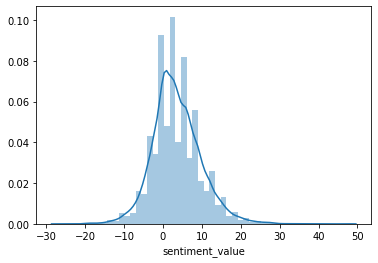

In [22]:
#density plot based on sentiment value

sns.distplot(data['sentiment_value'])

In [23]:
# Creating an index column
data['index']=range(0,len(data))

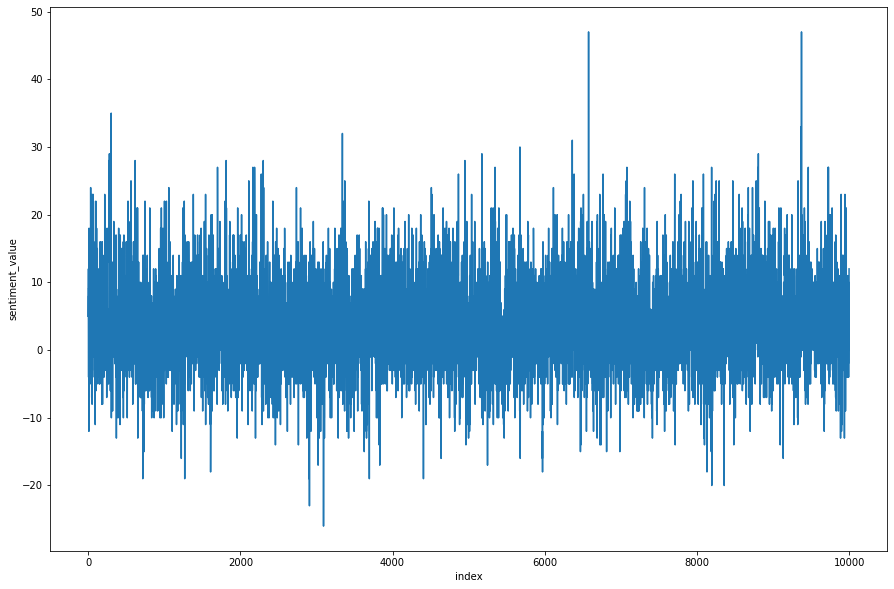

In [24]:
#lineplot based on sentiment value
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x = 'index',data=data)

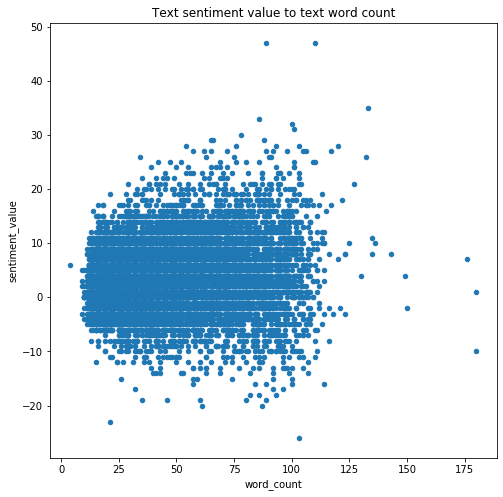

In [25]:
#scatter plot between wordcount and sentiment value
data.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Text sentiment value to text word count')

### After performing the sentiment analysis, most of the reviews are neutral and there are more no of positive reviews than the negative reviews.
